In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from experiments.all import train_and_evaluate
from tsm.configuration import TSMConfigParser
import docker
import logging

logging.basicConfig(level=logging.INFO)

# load configuration
config = TSMConfigParser()
config.read("/home/pablo/tesis/tsm-pipeline/code/configs/pablo-bestia.cfg")
config.check()
docker_client = docker.from_env()

In [3]:
from scripts.docker import read_dbs_dataset
from numpy.random import RandomState

nosql_dbs = read_dbs_dataset("/home/pablo/tesis/tsm-pipeline/experiments/datasets/nosql_1.txt")
# Using a fixed random state to have reproducible results
rand = RandomState(seed=5)

In [15]:
test_and_train = [
    "bitpay/bitcore-wallet-service/750172f"
]

res_dir = "/tmp/jupyter-env-check"
# !rm -rf $res_dir/*

train_and_evaluate(
    config=config,
    results_dir=res_dir,
    query_type="nosql",
    train=test_and_train,
    test=test_and_train,
    docker_client=docker_client,
    skip=["train"],
)

INFO:experiments.all:train_and_evaluate with train size 1, test size 1
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /tmp/jupyter-env-check/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating bitpay - bitcore-wallet-service
INFO:experiments.all:Running boosted evaluation
INFO:scripts.evaluate:creating /tmp/jupyter-env-check/boosted dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating bitpay - bitcore-wallet-service
INFO:experiments.all:Running v0 evaluation
INFO:scripts.evaluate:creating /tmp/jupyter-env-check/v0 dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating bitpay - bitcore-wallet-service


,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj
0,0.0,0.0,0.0,14,0,11,1,14.0


Hago una prueba con 10 y 10 sampleanod nosql

In [22]:
from sklearn.model_selection import train_test_split
from random import sample

sample_20 = sample(nosql_dbs, 20)
train, test = train_test_split(sample_20, train_size=.5, shuffle=True, random_state=rand)
print("train %d, test %d" %(len(train), len(test)))

train 10, test 10


In [24]:
res_dir = "/home/pablo/dev-results/nosql-20-check"
# !rm -rf $res_dir/*

train_and_evaluate(
    config=config,
    results_dir=res_dir,
    query_type="nosql",
    train=train,
    test=test,
    docker_client=docker_client,
)

INFO:experiments.all:train_and_evaluate with train size 10, test size 10
INFO:experiments.all:Running training
INFO:scripts.docker:creating /home/pablo/dev-results/nosql-20-check dir. Omitting error if already existing
INFO:scripts.docker:creating /tmp/log dir. Omitting error if already existing
INFO:scripts.docker:running at container 1476abe67068ef2493544a475d496a06dc54e2b17c4374f876c2746ea9369221. Use `docker logs 1476abe67068ef2493544a475d496a06dc54e2b17c4374f876c2746ea9369221 --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /home/pablo/dev-results/nosql-20-check/*/reprScores.txt
INFO:misc.combinescores:working on 6 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/nosql-20-check/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating ethereumclassic - explorer


,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj
0,0.08,0.285714,0.066667,14,4,46,4,3.5


In [27]:
train_dell_30 = ['OmarElGabry/chat.io/082952e',
 'AdoboFrenzy/Projects/9f25394',
 'securingsincity/Antidote-server/cc7714c',
 'jchiefelk/node-quandl/56a6ca3',
 'laurieroy/CampReview/3ee2945',
 'mikestaub/shortly-deploy/8de5365',
 'aheckmann/mquery/e68f8e1',
 'aerospike/aerospike-client-nodejs/5f6345f',
 'perftools/xhgui/3e8454c',
 'IBM/innovate-digital-bank/0124b73',
 'antonshevchenko/pager/0a03221',
 'devermaslinfy/demoproject/53120c3',
 'hiattp/express3-mongodb-bootstrap-demo/ed29eee',
 'Manouchehri/COMP2406-exam-storage/50d86e3',
 'athongintel/drawlove-android/e358f0d']

In [28]:
test_dell_30 = ['cablej/FileChangeMonitor/a7a3d9f',
 'LiJunpeng/URLShortenerService/5c0aa71',
 'ealeksandrov/NodeAPI/0147411',
 'aravindnc/mongoose-paginate-v2/9a09f76',
 'dotzero/node-url-shortener/1e5d04a',
 'vadimdemedes/mongorito/f9a553b',
 'kwhitley/apicache/b1b19f5',
 'sahat/tvshow-tracker/083614d',
 'PaulSec/VNWA/d3704e6',
 'if07012/sample-jwt/585984e',
 'CapacitorSet/rebridge/451bfc2',
 'cezerin/cezerin/af73bdb',
 'FrontendMasters/api-design-node-v3/ca8e738',
 'ethereumclassic/explorer/da39687',
 'architMahto/udemy-nodejs-angular2/b1ed580']

In [29]:
train_and_evaluate(
    config=config,
    results_dir="/home/pablo/dev-results/nosql-dell-30",
    query_type="nosql",
    train=train_dell_30,
    test=test_dell_30,
    docker_client=docker_client,
)

INFO:experiments.all:train_and_evaluate with train size 15, test size 15
INFO:experiments.all:Running training
INFO:scripts.docker:creating /home/pablo/dev-results/nosql-dell-30 dir. Omitting error if already existing
INFO:scripts.docker:creating /tmp/log dir. Omitting error if already existing
INFO:scripts.docker:running at container 8032a4a7e0b5749fc870b62fbafe0eaccf5f99e8cca93e813fa3306c8709a43e. Use `docker logs 8032a4a7e0b5749fc870b62fbafe0eaccf5f99e8cca93e813fa3306c8709a43e --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /home/pablo/dev-results/nosql-dell-30/*/reprScores.txt
INFO:misc.combinescores:working on 8 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/nosql-dell-30/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating cablej - FileChangeMonitor
INF

,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj
0,0.444444,0.666667,0.363636,24,16,20,9,2.666667


In [32]:
import tempfile
r = tempfile.mkdtemp()
print("using %s as results dir" % (r))
dbs = ['ethereumclassic/explorer/da39687']
train_and_evaluate(
    config=config,
    results_dir=r,
    query_type="nosql",
    train=dbs,
    test=dbs,
    docker_client=docker_client,
)

INFO:experiments.all:train_and_evaluate with train size 1, test size 1
INFO:experiments.all:Running training
INFO:scripts.docker:creating /tmp/tmp_qflv2lw dir. Omitting error if already existing
INFO:scripts.docker:creating /tmp/log dir. Omitting error if already existing


using /tmp/tmp_qflv2lw as results dir


INFO:scripts.docker:running at container c4cf90626fba97219761b920cb38a18ec5ba3fb51a35174947dd4486fad068d3. Use `docker logs c4cf90626fba97219761b920cb38a18ec5ba3fb51a35174947dd4486fad068d3 --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /tmp/tmp_qflv2lw/*/reprScores.txt
INFO:misc.combinescores:working on 1 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /tmp/tmp_qflv2lw/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating ethereumclassic - explorer
INFO:experiments.all:Running boosted evaluation
INFO:scripts.evaluate:creating /tmp/tmp_qflv2lw/boosted dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating ethereumclassic - explorer
INFO:experiments.all:Running v0 evaluation
INFO:scripts.evaluate:creating /tmp

,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj
0,1.0,0.5,0.5,2,1,0,1,2.0


## Prueba con 100 nosql, 50/50

In [36]:
from os.path import join
from os import mkdir

# make utility function to load from file, or sample and save
sample_100 = sample(nosql_dbs, 100)
results_dir = "/home/pablo/dev-results/nosql-100"

# with open(join(results_dir, "sample.txt"), "w") as f:
#     for s in sample_100:
#         f.write("%s\n" % (s))

In [38]:
rand2 = RandomState(seed=15)
train, test = train_test_split(sample_100, train_size=.5, shuffle=True, random_state=rand2)
print("train %d, test %d" %(len(train), len(test)))

train 50, test 50


In [39]:
train_and_evaluate(
    config=config,
    results_dir=results_dir,
    query_type="nosql",
    train=train,
    test=test,
    docker_client=docker_client,
)

INFO:experiments.all:train_and_evaluate with train size 50, test size 50
INFO:experiments.all:Running training
INFO:scripts.docker:creating /home/pablo/dev-results/nosql-100 dir. Omitting error if already existing
INFO:scripts.docker:creating /tmp/log dir. Omitting error if already existing
INFO:scripts.docker:running at container de2aa0232500c9af6a781b7f4cd199bddbf845f0678991de1245846663f3ade6. Use `docker logs de2aa0232500c9af6a781b7f4cd199bddbf845f0678991de1245846663f3ade6 --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /home/pablo/dev-results/nosql-100/*/reprScores.txt
INFO:misc.combinescores:working on 28 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/nosql-100/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating mikestaub - shortly-deploy
INFO:scripts.e

,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj
0,0.157233,0.757576,0.149701,99,75,402,30,3.3


## Probando con k-fold cross validation

Primero pruebo si se pude ejecutar el pipeline de train y evaluacion desde un arrray de numpy, generado usando `np.take`. Luego hago un 5-fold cross validation guardando los resultados

In [45]:
import numpy as np
import tempfile

taken_sample = np.take(sample_100, [0,1,3,50])
taken_sample_2 = np.take(sample_100, [2,7,10])
print(taken_sample)
print(taken_sample_2)

train_and_evaluate(
    config=config,
    results_dir=tempfile.mkdtemp(),
    query_type="nosql",
    train=taken_sample.tolist(),
    test=taken_sample_2.tolist(),
    docker_client=docker_client,
)

INFO:experiments.all:train_and_evaluate with train size 4, test size 3
INFO:experiments.all:Running training
INFO:scripts.docker:creating /tmp/tmpigsu_jss dir. Omitting error if already existing
INFO:scripts.docker:creating /tmp/log dir. Omitting error if already existing


['benas/gamehub.io/e60645f' 'processing/p5.js-web-editor/3357af6'
 'Cendey/contacts/252de32' 'itemsapi/itemsapi/ffa275b']
['FSecureLABS/dref/c4e5216' 'ForestAdmin/forest-express-mongoose/2b9166b'
 'rayandrews/lime/3e2a211']


INFO:scripts.docker:running at container 4a7d73eabb9ea396180d3fed28e082a8f0a1c5e87bdef93f1a3d44d599821b14. Use `docker logs 4a7d73eabb9ea396180d3fed28e082a8f0a1c5e87bdef93f1a3d44d599821b14 --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /tmp/tmpigsu_jss/*/reprScores.txt
INFO:misc.combinescores:working on 4 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /tmp/tmpigsu_jss/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating ForestAdmin - forest-express-mongoose
INFO:scripts.evaluate:Evaluating rayandrews - lime
INFO:scripts.evaluate:Evaluating FSecureLABS - dref
INFO:experiments.all:Running boosted evaluation
INFO:scripts.evaluate:creating /tmp/tmpigsu_jss/boosted dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Ev

,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj
0,0.9,0.75,0.692308,12,9,1,2,6.0


In [50]:
from sklearn.model_selection import KFold

# fixing random state to make this repeatable
kf = KFold(n_splits=5)
collected_results = []
base_results_dir = "/home/pablo/dev-results/nosql-5fold-"
for i, (train_index, test_index) in enumerate(kf.split(sample_100)):
    print("Fold %d" % (i))
    res_dir = "%s%d" % (base_results_dir, i)
    train_split = np.take(sample_100, train_index)
    test_split = np.take(sample_100, test_index)

    scores = train_and_evaluate(
        config=config,
        results_dir=res_dir,
        query_type="nosql",
        train=train_split.tolist(),
        test=test_split.tolist(),
        docker_client=docker_client,
    )
    print(scores)
    collected_results.append(scores)
print("done")

INFO:experiments.all:train_and_evaluate with train size 80, test size 20
INFO:experiments.all:Running training
INFO:scripts.docker:creating /home/pablo/dev-results/nosql-5fold-0 dir. Omitting error if already existing
INFO:scripts.docker:creating /tmp/log dir. Omitting error if already existing


Fold 0


INFO:scripts.docker:running at container c50bd6bd1d5bca96d43527a7d5b62f1bbbc0b00e3c370c9d372c692466ae3af3. Use `docker logs c50bd6bd1d5bca96d43527a7d5b62f1bbbc0b00e3c370c9d372c692466ae3af3 --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /home/pablo/dev-results/nosql-5fold-0/*/reprScores.txt
INFO:misc.combinescores:working on 46 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/nosql-5fold-0/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating processing - p5.js-web-editor
INFO:scripts.evaluate:Evaluating FSecureLABS - dref
INFO:scripts.evaluate:Evaluating benas - gamehub.io
INFO:scripts.evaluate:Evaluating FreetailHackers - saffron
INFO:scripts.evaluate:Evaluating Cendey - contacts
INFO:scripts.evaluate:Evaluating googleapis - nodejs-datastore
INFO:scripts.evalu

   precision  recall  ...  projects with atr  avg atr per proj
0   0.271845     0.7  ...                 14          2.857143

[1 rows x 8 columns]
Fold 1


INFO:scripts.docker:running at container 481ba9999b938c13ffa9ba1bef383863aad015a5f992cc07051b3f391516b12f. Use `docker logs 481ba9999b938c13ffa9ba1bef383863aad015a5f992cc07051b3f391516b12f --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /home/pablo/dev-results/nosql-5fold-1/*/reprScores.txt
INFO:misc.combinescores:working on 48 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/nosql-5fold-1/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating abhishekg785 - Schmooze
INFO:scripts.evaluate:Evaluating ladjs - lad
INFO:scripts.evaluate:Evaluating mjhea0 - Node-Express-Strap
INFO:scripts.evaluate:Evaluating vcapretz - bull-board
INFO:scripts.evaluate:Evaluating abansal98 - DataPool
INFO:scripts.evaluate:Evaluating calvinnguyenq - hackr
INFO:scripts.evaluate:Evaluatin

   precision    recall  ...  projects with atr  avg atr per proj
0   0.258333  0.794872  ...                  9          4.333333

[1 rows x 8 columns]
Fold 2


INFO:scripts.docker:running at container 4fcf74db9be32be2e8db91c578a097634c9a0b02712400d82827a96d42a3d283. Use `docker logs 4fcf74db9be32be2e8db91c578a097634c9a0b02712400d82827a96d42a3d283 --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /home/pablo/dev-results/nosql-5fold-2/*/reprScores.txt
INFO:misc.combinescores:working on 47 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/nosql-5fold-2/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating Xerios - mobx-isomorphic-starter
INFO:scripts.evaluate:Evaluating Hadh - Cord-System-Photon
INFO:scripts.evaluate:Evaluating buunguyen - mongoose-deep-populate
INFO:scripts.evaluate:Evaluating globocom - secDevLabs
INFO:scripts.evaluate:Evaluating gefangshuai - ANodeBlog
INFO:scripts.evaluate:Evaluating unbug - ddms
INFO:sc

   precision   recall  ...  projects with atr  avg atr per proj
0   0.174157  0.96875  ...                 12          2.666667

[1 rows x 8 columns]
Fold 3


INFO:scripts.docker:running at container 288a607f0f65e716ca28e7c5568ebb821c382662fdd4088c9d4ab68bef28a3ce. Use `docker logs 288a607f0f65e716ca28e7c5568ebb821c382662fdd4088c9d4ab68bef28a3ce --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /home/pablo/dev-results/nosql-5fold-3/*/reprScores.txt
INFO:misc.combinescores:working on 49 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/nosql-5fold-3/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating rlindskog - vueniverse
INFO:scripts.evaluate:Evaluating erikdubbelboer - redis-lua-scaling-bloom-filter
INFO:scripts.evaluate:Evaluating IBM - innovate-digital-bank
INFO:scripts.evaluate:Evaluating vinitkumar - node-twitter
INFO:scripts.evaluate:Evaluating athongintel - drawlove-android
INFO:scripts.evaluate:Evaluating jchi

   precision    recall  ...  projects with atr  avg atr per proj
0   0.243056  0.686275  ...                  9          5.666667

[1 rows x 8 columns]
Fold 4


INFO:scripts.docker:running at container 057b53f357e0331d6e2aad28717a9de0a3cf2d5a75ded0a7e522b3a660a86cff. Use `docker logs 057b53f357e0331d6e2aad28717a9de0a3cf2d5a75ded0a7e522b3a660a86cff --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /home/pablo/dev-results/nosql-5fold-4/*/reprScores.txt
INFO:misc.combinescores:working on 46 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/nosql-5fold-4/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating mikestaub - shortly-deploy
INFO:scripts.evaluate:Evaluating MattLong87 - winrate-api
INFO:scripts.evaluate:Evaluating luin - ioredis
INFO:scripts.evaluate:Evaluating danielfsousa - express-rest-es2017-boilerplate
INFO:scripts.evaluate:Evaluating PabloVallejo - Fun
INFO:scripts.evaluate:Evaluating Redsmin - proxy
INFO:script

   precision    recall  ...  projects with atr  avg atr per proj
0   0.180723  0.714286  ...                  9          2.333333

[1 rows x 8 columns]
done


In [53]:
import pandas as pd

concated_results = pd.concat(collected_results)
pd.concat([concated_results, concated_results.apply(['mean'])])

,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj
0,0.271845,0.700000,0.243478,40.0,28.0,75.0,14.0,2.857143
0,0.258333,0.794872,0.242188,39.0,31.0,89.0,9.0,4.333333
0,0.174157,0.968750,0.173184,32.0,31.0,147.0,12.0,2.666667
0,0.243056,0.686275,0.218750,51.0,35.0,109.0,9.0,5.666667
0,0.180723,0.714286,0.168539,21.0,15.0,68.0,9.0,2.333333
mean,0.225623,0.772836,0.209228,36.6,28.0,97.6,10.6,3.571429


## Resultados para sección evaluación

In [7]:
nosql_200_sample = rand.choice(nosql_dbs, size=200)

In [4]:
import pickle
import numpy as np

# with open("./nosql_200_sample.npy", "wb") as f:
#     np.save(f, nosql_200_sample)
with open("./nosql_200_sample.npy", "rb") as f:
    nosql_200_sample = np.load(f)

In [5]:
from sklearn.model_selection import KFold

# fixing random state to make this repeatable
kf = KFold(n_splits=5)
collected_results = []
base_results_dir = "/home/pablo/dev-results/nosql-200-5fold-"
splits = list(kf.split(nosql_200_sample))

In [9]:
for i, (train_index, test_index) in enumerate(splits):
    print("Fold %d" % (i))
    res_dir = "%s%d" % (base_results_dir, i)
    train_split = np.take(nosql_200_sample, train_index)
    test_split = np.take(nosql_200_sample, test_index)

    scores = train_and_evaluate(
        config=config,
        results_dir=res_dir,
        query_type="nosql",
        train=train_split.tolist(),
        test=test_split.tolist(),
        docker_client=docker_client,
    )
    print(scores)
    collected_results.append(scores)
print("done")

INFO:experiments.all:train_and_evaluate with train size 160, test size 40
INFO:experiments.all:Running training
INFO:scripts.docker:creating /home/pablo/dev-results/nosql-200-5fold-0 dir. Omitting error if already existing
INFO:scripts.docker:creating /tmp/log dir. Omitting error if already existing


Fold 0


INFO:scripts.docker:running at container 4ed7151778f9bb4f6584911b4cd43da2cec8ca9ce93055cf438a264d54ccd074. Use `docker logs 4ed7151778f9bb4f6584911b4cd43da2cec8ca9ce93055cf438a264d54ccd074 --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /home/pablo/dev-results/nosql-200-5fold-0/*/reprScores.txt
INFO:misc.combinescores:working on 63 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/nosql-200-5fold-0/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating dfirebaugh - voting-app
INFO:scripts.evaluate:Evaluating openhab - openhab-cloud
INFO:scripts.evaluate:Evaluating Binomi0 - crm-backoffice-api
INFO:scripts.evaluate:Evaluating BlinkTagInc - gtfs-to-html
INFO:scripts.evaluate:Evaluating danielstjules - redislock
INFO:scripts.evaluate:Evaluating DrMongo - DrMongo
INFO

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.074275  0.353448  0.065391                      116                41   

   suprious alerts  projects with atr  avg atr per proj  
0              511                 20               5.8  
Fold 1


INFO:scripts.docker:running at container f0c64263e105162ed2cd3a31693db91c2804541befa9aa59d507b9b8070c54c8. Use `docker logs f0c64263e105162ed2cd3a31693db91c2804541befa9aa59d507b9b8070c54c8 --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /home/pablo/dev-results/nosql-200-5fold-1/*/reprScores.txt
INFO:misc.combinescores:working on 65 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/nosql-200-5fold-1/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating jedireza - aqua
INFO:scripts.evaluate:Evaluating CodepediaOrg - bookmarks.dev-api
INFO:scripts.evaluate:Evaluating aerospike - aerospike-client-nodejs
INFO:scripts.evaluate:Evaluating sambragge - DojoAssignments
INFO:scripts.evaluate:Evaluating ChangerHe - My-code
INFO:scripts.evaluate:Evaluating lisanoetzel - rate-

CLIError: Failed to run query: A fatal error occurred: Error initializing the IMB disk cache: the cache directory is already locked by another running process. Only one instance of the IMB can access a cache directory at a time. The lock file is located at /home/pablo/dbcache/2.5.2/benas/gamehub.io/e60645f/db-javascript/default/cache/.lock
(eventual cause: OverlappingFileLockException)


Re-running fold 1 evaluation

In [9]:
# the failed iteartion
i = 1
res_dir = "%s%d" % (base_results_dir, i)
train_index, test_index = list(splits)[i]
train_split = np.take(nosql_200_sample, train_index)
test_split = np.take(nosql_200_sample, test_index)

scores = train_and_evaluate(
    config=config,
    results_dir=res_dir,
    query_type="nosql",
    train=train_split.tolist(),
    test=test_split.tolist(),
    docker_client=docker_client,
    skip=["train"]
)
print(scores)
collected_results.append(scores)

INFO:experiments.all:train_and_evaluate with train size 160, test size 40
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/nosql-200-5fold-1/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating jedireza - aqua
INFO:scripts.evaluate:Evaluating lisanoetzel - rate-admin
INFO:scripts.evaluate:Evaluating aerospike - aerospike-client-nodejs
INFO:scripts.evaluate:Evaluating ChangerHe - My-code
INFO:scripts.evaluate:Evaluating CodepediaOrg - bookmarks.dev-api
INFO:scripts.evaluate:Evaluating helnokaly - adonis-cache
INFO:scripts.evaluate:Evaluating sambragge - DojoAssignments
INFO:scripts.evaluate:Evaluating lykmapipo - kue-scheduler
INFO:scripts.evaluate:Evaluating shivam2407 - smallTask
INFO:scripts.evaluate:Evaluating ravisuhag - jolly
INFO:scripts.evaluate:Evaluating kunalkapadia - express-mongoose-es6-rest-api
INFO:scripts.evaluate:Evaluating maritz - no

   precision   recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.091408  0.78125  0.089127                       64                50   

   suprious alerts  projects with atr  avg atr per proj  
0              497                 18          3.555556  


Cargo denuevo los scores del fold 0

In [10]:
from scripts.calculate_scores import calculate_scores_df

df = calculate_scores_df("%s%d" % (base_results_dir, 0), cleanup_base_dir="tmp")
collected_results.append(df)
df

,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj
0,0.074275,0.353448,0.065391,116,41,511,20,5.8


Retomo del fold 2 en adelante

In [ ]:
for i, (train_index, test_index) in enumerate(splits):
    print("Fold %d" % (i))
    if i <= 1:
        print("skipping fold, already ran")
        continue
    res_dir = "%s%d" % (base_results_dir, i)
    train_split = np.take(nosql_200_sample, train_index)
    test_split = np.take(nosql_200_sample, test_index)

    scores = train_and_evaluate(
        config=config,
        results_dir=res_dir,
        query_type="nosql",
        train=train_split.tolist(),
        test=test_split.tolist(),
        docker_client=docker_client,
    )
    print(scores)
    collected_results.append(scores)
print("done")

INFO:experiments.all:train_and_evaluate with train size 160, test size 40
INFO:experiments.all:Running training
INFO:scripts.docker:creating /home/pablo/dev-results/nosql-200-5fold-2 dir. Omitting error if already existing
INFO:scripts.docker:creating /tmp/log dir. Omitting error if already existing


Fold 0
skipping fold, already ran
Fold 1
skipping fold, already ran
Fold 2


INFO:scripts.docker:running at container b8b4d2bdd2fd67f1f6aff0bef583f2a15a277553dded7b86d5e3d81df2e44d37. Use `docker logs b8b4d2bdd2fd67f1f6aff0bef583f2a15a277553dded7b86d5e3d81df2e44d37 --tail 10 --follow` to follow progress
INFO:scripts.docker:running combine scores
INFO:misc.combinescores:globbing folder: /home/pablo/dev-results/nosql-200-5fold-2/*/reprScores.txt
INFO:misc.combinescores:working on 63 reprScores files
INFO:experiments.all:Running worse evaluation
INFO:scripts.evaluate:creating /home/pablo/dev-results/nosql-200-5fold-2/worse dir. Omitting error if already existing
INFO:scripts.evaluate:Starting processing with 4 processes
INFO:scripts.evaluate:Evaluating theGioiLa - File-Management-
INFO:scripts.evaluate:Evaluating jedireza - frame
INFO:scripts.evaluate:Evaluating Cendey - contacts
INFO:scripts.evaluate:Evaluating DanWahlin - CustomerManager
INFO:scripts.evaluate:Evaluating StudioDeTelevision - admiraljs
INFO:scripts.evaluate:Evaluating knoldus - Node.js_UserLogin_T

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.140969  0.969697  0.140351                       33                32   

   suprious alerts  projects with atr  avg atr per proj  
0              195                 16            2.0625  
Fold 3


INFO:scripts.docker:running at container c160ff6f1116acfd535afb8a39f0fb2f8c81d4369ce92fc97ed4748175868969. Use `docker logs c160ff6f1116acfd535afb8a39f0fb2f8c81d4369ce92fc97ed4748175868969 --tail 10 --follow` to follow progress


In [24]:
collected_results = []
for i in range(5):
    df = calculate_scores_df("%s%d" % (base_results_dir, i), cleanup_base_dir="tmp")
    collected_results.append(df)

In [33]:
import pandas as pd

concated_results = pd.concat(collected_results)
concated_results = pd.concat([concated_results, concated_results.apply(['mean'])])
concated_results['name'] = [f'fold {i}' for i in range(5)] + ['mean']
concated_results

,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj,name
0,0.074275,0.353448,0.065391,116.0,41.0,511.0,20.0,5.800000,fold 0
0,0.091408,0.781250,0.089127,64.0,50.0,497.0,18.0,3.555556,fold 1
0,0.140969,0.969697,0.140351,33.0,32.0,195.0,16.0,2.062500,fold 2
0,0.156757,0.349398,0.121339,166.0,58.0,312.0,18.0,9.222222,fold 3
0,0.144304,0.876923,0.141439,65.0,57.0,338.0,19.0,3.421053,fold 4
mean,0.121543,0.666143,0.111529,88.8,47.6,370.6,18.2,4.812266,mean


In [35]:
with open("nosql_200_results.csv", "w") as f:
    concated_results.to_csv(f, float_format='%.4f')

## Probando subir precision

Prueba de subir el `MinScoreSink` a 0.5, para ver si aumentan la precision y disminuye el recall.

In [6]:
for i, (train_index, test_index) in enumerate(splits):
    print("Fold %d" % (i))
    res_dir = "%s%d" % (base_results_dir, i)
    train_split = np.take(nosql_200_sample, train_index)
    test_split = np.take(nosql_200_sample, test_index)

    scores = train_and_evaluate(
        config=config,
        results_dir=res_dir,
        query_type="nosql",
        train=train_split.tolist(),
        test=test_split.tolist(),
        docker_client=docker_client,
        skip=["train"]
    )
    print(scores)
print("done")

[WARNING	2023-07-15 09:53:15,027] experiments.all	configued to skip the following steps: train
[INFO	2023-07-15 09:53:15,028] experiments.all	train_and_evaluate with train size 160, test size 40
[WARNING	2023-07-15 09:53:15,029] experiments.all	skipping train
[INFO	2023-07-15 09:53:15,029] experiments.all	Running worse evaluation
[INFO	2023-07-15 09:53:15,029] scripts.evaluate	creating /home/pablo/dev-results/nosql-200-5fold-0/worse dir. Omitting error if already existing
[INFO	2023-07-15 09:53:15,206] scripts.evaluate	Starting processing with 4 processes


Fold 0


[INFO	2023-07-15 09:53:15,221] scripts.evaluate	Evaluating dfirebaugh - voting-app
[INFO	2023-07-15 09:53:15,221] scripts.evaluate	Evaluating jedireza - aqua
[INFO	2023-07-15 09:53:15,221] scripts.evaluate	Evaluating openhab - openhab-cloud
[INFO	2023-07-15 09:53:15,221] scripts.evaluate	Evaluating BlinkTagInc - gtfs-to-html
[INFO	2023-07-15 09:53:15,221] scripts.evaluate	Evaluating Binomi0 - crm-backoffice-api
[INFO	2023-07-15 09:53:15,221] scripts.evaluate	Evaluating saintedlama - restify-mongoose
[INFO	2023-07-15 09:53:15,221] scripts.evaluate	Evaluating danielstjules - redislock
[INFO	2023-07-15 09:53:15,221] scripts.evaluate	Evaluating DrMongo - DrMongo
[INFO	2023-07-15 09:53:27,640] scripts.evaluate	database /home/pablo/dbcache/2.5.2/saintedlama/restify-mongoose/1c01c5b ok
[INFO	2023-07-15 09:53:27,655] scripts.evaluate	Evaluating danielfsousa - express-rest-es2017-boilerplate
[INFO	2023-07-15 09:53:29,375] scripts.evaluate	database /home/pablo/dbcache/2.5.2/DrMongo/DrMongo/ce83c

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.027778  0.017241  0.010753                      116                 2   

   suprious alerts  projects with atr  avg atr per proj  
0               70                 20               5.8  
Fold 1


[INFO	2023-07-15 09:55:55,557] scripts.evaluate	Evaluating CodepediaOrg - bookmarks.dev-api
[INFO	2023-07-15 09:55:55,557] scripts.evaluate	Evaluating jedireza - aqua
[INFO	2023-07-15 09:55:55,557] scripts.evaluate	Evaluating aerospike - aerospike-client-nodejs
[INFO	2023-07-15 09:55:55,557] scripts.evaluate	Evaluating helnokaly - adonis-cache
[INFO	2023-07-15 09:55:55,557] scripts.evaluate	Evaluating lisanoetzel - rate-admin
[INFO	2023-07-15 09:55:55,557] scripts.evaluate	Evaluating sambragge - DojoAssignments
[INFO	2023-07-15 09:55:55,557] scripts.evaluate	Evaluating ChangerHe - My-code
[INFO	2023-07-15 09:55:55,557] scripts.evaluate	Evaluating lykmapipo - kue-scheduler
[INFO	2023-07-15 09:56:00,432] scripts.evaluate	database /home/pablo/dbcache/2.5.2/helnokaly/adonis-cache/f014ba8 ok
[INFO	2023-07-15 09:56:00,435] scripts.evaluate	Evaluating kunalkapadia - express-mongoose-es6-rest-api
[INFO	2023-07-15 09:56:00,646] scripts.evaluate	database /home/pablo/dbcache/2.5.2/lykmapipo/kue-s

   precision   recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.012739  0.03125  0.009132                       64                 2   

   suprious alerts  projects with atr  avg atr per proj  
0              155                 18          3.555556  
Fold 2


[INFO	2023-07-15 09:59:28,659] scripts.evaluate	Evaluating Cendey - contacts
[INFO	2023-07-15 09:59:28,659] scripts.evaluate	Evaluating jedireza - frame
[INFO	2023-07-15 09:59:28,659] scripts.evaluate	Evaluating sully1313 - Ecommerce
[INFO	2023-07-15 09:59:28,659] scripts.evaluate	Evaluating DanWahlin - CustomerManager
[INFO	2023-07-15 09:59:28,659] scripts.evaluate	Evaluating theGioiLa - File-Management-
[INFO	2023-07-15 09:59:28,659] scripts.evaluate	Evaluating knoldus - Node.js_UserLogin_Template
[INFO	2023-07-15 09:59:28,659] scripts.evaluate	Evaluating ForestAdmin - forest-express-mongoose
[INFO	2023-07-15 09:59:28,659] scripts.evaluate	Evaluating StudioDeTelevision - admiraljs
[INFO	2023-07-15 09:59:33,943] scripts.evaluate	database /home/pablo/dbcache/2.5.2/ForestAdmin/forest-express-mongoose/2b9166b ok
[INFO	2023-07-15 09:59:33,974] scripts.evaluate	Evaluating DanWahlin - CustomerManager
[INFO	2023-07-15 09:59:34,302] scripts.evaluate	database /home/pablo/dbcache/2.5.2/jedireza

   precision  recall  accuracy  alerts to recover (atr)  alerts recovered  \
0        0.0     0.0       0.0                       33                 0   

   suprious alerts  projects with atr  avg atr per proj  
0               66                 16            2.0625  
Fold 3


[INFO	2023-07-15 10:01:29,906] scripts.evaluate	Evaluating laurieroy - CampReview
[INFO	2023-07-15 10:01:29,906] scripts.evaluate	Evaluating DBULL7 - uhoops
[INFO	2023-07-15 10:01:29,906] scripts.evaluate	Evaluating sully1313 - Ecommerce
[INFO	2023-07-15 10:01:29,906] scripts.evaluate	Evaluating meteor - meteor
[INFO	2023-07-15 10:01:29,906] scripts.evaluate	Evaluating kdchang - reactjs101
[INFO	2023-07-15 10:01:29,906] scripts.evaluate	Evaluating WaftTech - WaftEngine
[INFO	2023-07-15 10:01:29,906] scripts.evaluate	Evaluating HabitRPG - habitica
[INFO	2023-07-15 10:01:29,906] scripts.evaluate	Evaluating aravindnc - mongoose-paginate-v2
[INFO	2023-07-15 10:01:35,360] scripts.evaluate	database /home/pablo/dbcache/2.5.2/aravindnc/mongoose-paginate-v2/9a09f76 ok
[INFO	2023-07-15 10:01:35,371] scripts.evaluate	Evaluating StephenGrider - AdvancedReduxCode
[INFO	2023-07-15 10:01:36,246] scripts.evaluate	database /home/pablo/dbcache/2.5.2/sully1313/Ecommerce/2908632 ok
[INFO	2023-07-15 10:01:

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.008772  0.006024  0.003584                      166                 1   

   suprious alerts  projects with atr  avg atr per proj  
0              113                 18          9.222222  
Fold 4


[INFO	2023-07-15 10:03:45,746] scripts.evaluate	Evaluating kunalkapadia - express-mongoose-es6-rest-api
[INFO	2023-07-15 10:03:45,746] scripts.evaluate	Evaluating DanialK - PassportJS-Authentication
[INFO	2023-07-15 10:03:45,746] scripts.evaluate	Evaluating prateekbh - Guess
[INFO	2023-07-15 10:03:45,747] scripts.evaluate	Evaluating kaushiknishchay - photowala
[INFO	2023-07-15 10:03:45,747] scripts.evaluate	Evaluating athongintel - drawlove-android
[INFO	2023-07-15 10:03:45,747] scripts.evaluate	Evaluating HackCU - jakehockey10
[INFO	2023-07-15 10:03:45,746] scripts.evaluate	Evaluating AdoboFrenzy - Projects
[INFO	2023-07-15 10:03:45,747] scripts.evaluate	Evaluating bdvu - BVmeanauthapp
[INFO	2023-07-15 10:03:52,202] scripts.evaluate	database /home/pablo/dbcache/2.5.2/kunalkapadia/express-mongoose-es6-rest-api/0b4fe21 ok
[INFO	2023-07-15 10:03:52,203] scripts.evaluate	Evaluating ethereumclassic - explorer
[INFO	2023-07-15 10:03:52,214] scripts.evaluate	database /home/pablo/dbcache/2.5.

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.218935  0.569231  0.187817                       65                37   

   suprious alerts  projects with atr  avg atr per proj  
0              132                 19          3.421053  
done


In [10]:
from scripts.calculate_scores import calculate_scores_df
collected_results = []
for i in range(5):
    df = calculate_scores_df("%s%d" % (base_results_dir, i), cleanup_base_dir="tmp")
    collected_results.append(df)

In [11]:
import pandas as pd

concated_results = pd.concat(collected_results)
concated_results = pd.concat([concated_results, concated_results.apply(['mean'])])
concated_results['name'] = [f'fold {i}' for i in range(5)] + ['mean']
concated_results

,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj,name
0,0.027778,0.017241,0.010753,116.0,2.0,70.0,20.0,5.800000,fold 0
0,0.012739,0.031250,0.009132,64.0,2.0,155.0,18.0,3.555556,fold 1
0,0.000000,0.000000,0.000000,33.0,0.0,66.0,16.0,2.062500,fold 2
0,0.008772,0.006024,0.003584,166.0,1.0,113.0,18.0,9.222222,fold 3
0,0.218935,0.569231,0.187817,65.0,37.0,132.0,19.0,3.421053,fold 4
mean,0.053645,0.124749,0.042257,88.8,8.4,107.2,18.2,4.812266,mean


In [12]:
with open("nosql_200_minreprscore0p5_results.csv", "w") as f:
    concated_results.to_csv(f, float_format='%.4f')

Viendo plot de distribucion normal de los scores

In [27]:
from glob import glob
dfs = []
for scores_file in glob("/home/pablo/dev-results/nosql-200-5fold-*/averaged-results.csv"):
    dfs.append(pd.read_csv(scores_file, names=["repr", "role", "score"]))
scores_df = pd.concat(dfs)

<Axes: ylabel='Frequency'>

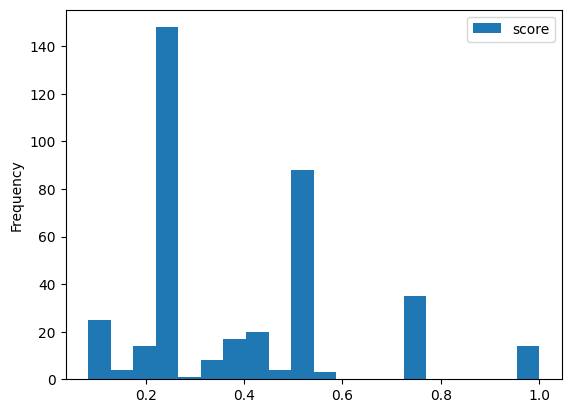

In [33]:
scores_df.plot.hist(by=["score"], bins=20)

Probando con `MinScoreSink` 0.2, debido a que el histrograma de arriba dice que descarta solo un par

In [34]:
for i, (train_index, test_index) in enumerate(splits):
    print("Fold %d" % (i))
    res_dir = "%s%d" % (base_results_dir, i)
    train_split = np.take(nosql_200_sample, train_index)
    test_split = np.take(nosql_200_sample, test_index)

    scores = train_and_evaluate(
        config=config,
        results_dir=res_dir,
        query_type="nosql",
        train=train_split.tolist(),
        test=test_split.tolist(),
        docker_client=docker_client,
        skip=["train"]
    )
    print(scores)
print("done")

[WARNING	2023-07-15 10:30:59,965] experiments.all	configued to skip the following steps: train
[INFO	2023-07-15 10:30:59,965] experiments.all	train_and_evaluate with train size 160, test size 40
[WARNING	2023-07-15 10:30:59,966] experiments.all	skipping train
[INFO	2023-07-15 10:30:59,966] experiments.all	Running worse evaluation
[INFO	2023-07-15 10:30:59,966] scripts.evaluate	creating /home/pablo/dev-results/nosql-200-5fold-0/worse dir. Omitting error if already existing
[INFO	2023-07-15 10:31:00,146] scripts.evaluate	Starting processing with 4 processes


Fold 0


[INFO	2023-07-15 10:31:00,174] scripts.evaluate	Evaluating openhab - openhab-cloud
[INFO	2023-07-15 10:31:00,174] scripts.evaluate	Evaluating saintedlama - restify-mongoose
[INFO	2023-07-15 10:31:00,174] scripts.evaluate	Evaluating dfirebaugh - voting-app
[INFO	2023-07-15 10:31:00,174] scripts.evaluate	Evaluating BlinkTagInc - gtfs-to-html
[INFO	2023-07-15 10:31:00,174] scripts.evaluate	Evaluating danielstjules - redislock
[INFO	2023-07-15 10:31:00,174] scripts.evaluate	Evaluating jedireza - aqua
[INFO	2023-07-15 10:31:00,174] scripts.evaluate	Evaluating DrMongo - DrMongo
[INFO	2023-07-15 10:31:00,174] scripts.evaluate	Evaluating Binomi0 - crm-backoffice-api
[INFO	2023-07-15 10:31:19,213] scripts.evaluate	database /home/pablo/dbcache/2.5.2/saintedlama/restify-mongoose/1c01c5b ok
[INFO	2023-07-15 10:31:19,228] scripts.evaluate	Evaluating danielfsousa - express-rest-es2017-boilerplate
[INFO	2023-07-15 10:31:19,617] scripts.evaluate	database /home/pablo/dbcache/2.5.2/DrMongo/DrMongo/ce83c

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.074275  0.353448  0.065391                      116                41   

   suprious alerts  projects with atr  avg atr per proj  
0              511                 20               5.8  
Fold 1


[INFO	2023-07-15 10:33:49,659] scripts.evaluate	Evaluating lisanoetzel - rate-admin
[INFO	2023-07-15 10:33:49,659] scripts.evaluate	Evaluating aerospike - aerospike-client-nodejs
[INFO	2023-07-15 10:33:49,659] scripts.evaluate	Evaluating jedireza - aqua
[INFO	2023-07-15 10:33:49,659] scripts.evaluate	Evaluating ChangerHe - My-code
[INFO	2023-07-15 10:33:49,659] scripts.evaluate	Evaluating CodepediaOrg - bookmarks.dev-api
[INFO	2023-07-15 10:33:49,659] scripts.evaluate	Evaluating helnokaly - adonis-cache
[INFO	2023-07-15 10:33:49,659] scripts.evaluate	Evaluating lykmapipo - kue-scheduler
[INFO	2023-07-15 10:33:49,659] scripts.evaluate	Evaluating sambragge - DojoAssignments
[INFO	2023-07-15 10:33:54,592] scripts.evaluate	database /home/pablo/dbcache/2.5.2/lykmapipo/kue-scheduler/2e6f85c ok
[INFO	2023-07-15 10:33:54,624] scripts.evaluate	Evaluating shivam2407 - smallTask
[INFO	2023-07-15 10:33:54,710] scripts.evaluate	database /home/pablo/dbcache/2.5.2/helnokaly/adonis-cache/f014ba8 ok
[I

   precision   recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.091408  0.78125  0.089127                       64                50   

   suprious alerts  projects with atr  avg atr per proj  
0              497                 18          3.555556  
Fold 2


[INFO	2023-07-15 10:38:44,726] scripts.evaluate	Evaluating jedireza - frame
[INFO	2023-07-15 10:38:44,726] scripts.evaluate	Evaluating Cendey - contacts
[INFO	2023-07-15 10:38:44,726] scripts.evaluate	Evaluating DanWahlin - CustomerManager
[INFO	2023-07-15 10:38:44,726] scripts.evaluate	Evaluating sully1313 - Ecommerce
[INFO	2023-07-15 10:38:44,726] scripts.evaluate	Evaluating theGioiLa - File-Management-
[INFO	2023-07-15 10:38:44,726] scripts.evaluate	Evaluating knoldus - Node.js_UserLogin_Template
[INFO	2023-07-15 10:38:44,726] scripts.evaluate	Evaluating StudioDeTelevision - admiraljs
[INFO	2023-07-15 10:38:44,726] scripts.evaluate	Evaluating ForestAdmin - forest-express-mongoose
[INFO	2023-07-15 10:38:50,225] scripts.evaluate	database /home/pablo/dbcache/2.5.2/jedireza/frame/db0efc0 ok
[INFO	2023-07-15 10:38:50,238] scripts.evaluate	Evaluating playcommunity - play-community
[INFO	2023-07-15 10:38:50,261] scripts.evaluate	database /home/pablo/dbcache/2.5.2/ForestAdmin/forest-express

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.148837  0.969697  0.148148                       33                32   

   suprious alerts  projects with atr  avg atr per proj  
0              183                 16            2.0625  
Fold 3


[INFO	2023-07-15 10:40:47,780] scripts.evaluate	Starting processing with 4 processes
[INFO	2023-07-15 10:40:47,799] scripts.evaluate	Evaluating meteor - meteor
[INFO	2023-07-15 10:40:47,799] scripts.evaluate	Evaluating laurieroy - CampReview
[INFO	2023-07-15 10:40:47,799] scripts.evaluate	Evaluating WaftTech - WaftEngine
[INFO	2023-07-15 10:40:47,799] scripts.evaluate	Evaluating kdchang - reactjs101
[INFO	2023-07-15 10:40:47,799] scripts.evaluate	Evaluating DBULL7 - uhoops
[INFO	2023-07-15 10:40:47,799] scripts.evaluate	Evaluating sully1313 - Ecommerce
[INFO	2023-07-15 10:40:47,799] scripts.evaluate	Evaluating aravindnc - mongoose-paginate-v2
[INFO	2023-07-15 10:40:47,799] scripts.evaluate	Evaluating HabitRPG - habitica
[INFO	2023-07-15 10:40:53,555] scripts.evaluate	database /home/pablo/dbcache/2.5.2/aravindnc/mongoose-paginate-v2/9a09f76 ok
[INFO	2023-07-15 10:40:53,579] scripts.evaluate	Evaluating StephenGrider - AdvancedReduxCode
[INFO	2023-07-15 10:40:54,732] scripts.evaluate	data

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.156757  0.349398  0.121339                      166                58   

   suprious alerts  projects with atr  avg atr per proj  
0              312                 18          9.222222  
Fold 4


[INFO	2023-07-15 10:43:04,076] scripts.evaluate	Evaluating kunalkapadia - express-mongoose-es6-rest-api
[INFO	2023-07-15 10:43:04,076] scripts.evaluate	Evaluating HackCU - jakehockey10
[INFO	2023-07-15 10:43:04,076] scripts.evaluate	Evaluating kaushiknishchay - photowala
[INFO	2023-07-15 10:43:04,076] scripts.evaluate	Evaluating DanialK - PassportJS-Authentication
[INFO	2023-07-15 10:43:04,076] scripts.evaluate	Evaluating prateekbh - Guess
[INFO	2023-07-15 10:43:04,076] scripts.evaluate	Evaluating AdoboFrenzy - Projects
[INFO	2023-07-15 10:43:04,076] scripts.evaluate	Evaluating bdvu - BVmeanauthapp
[INFO	2023-07-15 10:43:04,076] scripts.evaluate	Evaluating athongintel - drawlove-android
[INFO	2023-07-15 10:43:10,420] scripts.evaluate	database /home/pablo/dbcache/2.5.2/HackCU/jakehockey10/9607c59 ok
[INFO	2023-07-15 10:43:10,421] scripts.evaluate	Evaluating Abdizriel - nodejs-microservice-starter
[INFO	2023-07-15 10:43:10,502] scripts.evaluate	database /home/pablo/dbcache/2.5.2/prateekb

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.154472  0.876923  0.151194                       65                57   

   suprious alerts  projects with atr  avg atr per proj  
0              312                 19          3.421053  
done


In [35]:
from scripts.calculate_scores import calculate_scores_df
collected_results = []
for i in range(5):
    df = calculate_scores_df("%s%d" % (base_results_dir, i), cleanup_base_dir="tmp")
    collected_results.append(df)

In [36]:
import pandas as pd

concated_results = pd.concat(collected_results)
concated_results = pd.concat([concated_results, concated_results.apply(['mean'])])
concated_results['name'] = [f'fold {i}' for i in range(5)] + ['mean']
concated_results

,precision,recall,accuracy,alerts to recover (atr),alerts recovered,suprious alerts,projects with atr,avg atr per proj,name
0,0.074275,0.353448,0.065391,116.0,41.0,511.0,20.0,5.800000,fold 0
0,0.091408,0.781250,0.089127,64.0,50.0,497.0,18.0,3.555556,fold 1
0,0.148837,0.969697,0.148148,33.0,32.0,183.0,16.0,2.062500,fold 2
0,0.156757,0.349398,0.121339,166.0,58.0,312.0,18.0,9.222222,fold 3
0,0.154472,0.876923,0.151194,65.0,57.0,312.0,19.0,3.421053,fold 4
mean,0.125150,0.666143,0.115040,88.8,47.6,363.0,18.2,4.812266,mean


In [37]:
with open("nosql_200_minreprscore0p2_results.csv", "w") as f:
    concated_results.to_csv(f, float_format='%.4f')

Prueba de overfitting para ver si suben significativamente los scores

In [55]:
train_index, test_index = splits[2]
fold_folder = "%s%d" % (base_results_dir, 2)

In [60]:
overfitted_evaluation_set = np.concatenate([rand.choice(train_index, size=40), rand.choice(test_index, size=0)])

In [65]:
overfitted_evaluation_set

array(['PaulSavignano/aussiemoving-staging/7667d8b',
       'aravindnc/mongoose-paginate-v2/9a09f76',
       'DrMongo/DrMongo/ce83cab', 'prateekbh/Guess/54637d7',
       'krthr/felinorte/5f1514b', 'Redsmin/proxy/0b20436',
       'jedireza/aqua/f185bd2', 'vinitkumar/node-twitter/59d84ff',
       'ethereumclassic/explorer/da39687',
       'danielstjules/redislock/a8241e6', 'oswinso/kids4kids/3e51084',
       'benas/gamehub.io/e60645f', 'neagle/gokibitz/338ec1b',
       'variety/variety/46df253', 'cezerin/cezerin/af73bdb',
       'F0xedb/WebCalendar/a18c0a0', 'openhab/openhab-cloud/d0186ec',
       'HackCU/jakehockey10/9607c59', 'HackCU/jakehockey10/9607c59',
       'madhums/node-express-mongoose/d9b2014',
       'CapacitorSet/rebridge/451bfc2', 'WaftTech/WaftEngine/5636276',
       'FSecureLABS/dref/c4e5216', 'sambragge/DojoAssignments/6de385b',
       'jedireza/aqua/f185bd2', 'Gingernaut/Robot-Lawyer/56b86ac',
       'rauchg/smashingnode/3ca4280', 'meteor/meteor/a1caff0',
       'parabi

In [63]:
fold_folder

'/home/pablo/dev-results/nosql-200-5fold-2'

In [62]:
overfitted_evaluation_set = np.take(nosql_200_sample, overfitted_evaluation_set)
scores = train_and_evaluate(
        config=config,
        results_dir=fold_folder,
        query_type="nosql",
        train=train_split.tolist(),
        test=overfitted_evaluation_set.tolist(),
        docker_client=docker_client,
        skip=["train"]
    )
print(scores)

[WARNING	2023-07-15 13:49:47,283] experiments.all	configued to skip the following steps: train
[INFO	2023-07-15 13:49:47,284] experiments.all	train_and_evaluate with train size 160, test size 40
[WARNING	2023-07-15 13:49:47,285] experiments.all	skipping train
[INFO	2023-07-15 13:49:47,285] experiments.all	Running worse evaluation
[INFO	2023-07-15 13:49:47,285] scripts.evaluate	creating /home/pablo/dev-results/nosql-200-5fold-2/worse dir. Omitting error if already existing
[INFO	2023-07-15 13:49:47,469] scripts.evaluate	Starting processing with 4 processes
[INFO	2023-07-15 13:49:47,492] scripts.evaluate	Evaluating PaulSavignano - aussiemoving-staging
[INFO	2023-07-15 13:49:47,492] scripts.evaluate	Evaluating DrMongo - DrMongo
[INFO	2023-07-15 13:49:47,492] scripts.evaluate	Evaluating krthr - felinorte
[INFO	2023-07-15 13:49:47,492] scripts.evaluate	Evaluating ethereumclassic - explorer
[INFO	2023-07-15 13:49:47,492] scripts.evaluate	Evaluating jedireza - aqua
[INFO	2023-07-15 13:49:47,4

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.135053  0.458763  0.116492                      194                89   

   suprious alerts  projects with atr  avg atr per proj  
0              570                 38          5.105263  


Corrida despues de borrar en el results_dir worse, v0 y boosted

In [67]:
scores = train_and_evaluate(
        config=config,
        results_dir=fold_folder,
        query_type="nosql",
        train=train_split.tolist(),
        test=overfitted_evaluation_set.tolist(),
        docker_client=docker_client,
        skip=["train"]
    )
print(scores)

[WARNING	2023-07-15 13:54:11,243] experiments.all	configued to skip the following steps: train
[INFO	2023-07-15 13:54:11,244] experiments.all	train_and_evaluate with train size 160, test size 40
[WARNING	2023-07-15 13:54:11,245] experiments.all	skipping train
[INFO	2023-07-15 13:54:11,245] experiments.all	Running worse evaluation
[INFO	2023-07-15 13:54:11,245] scripts.evaluate	creating /home/pablo/dev-results/nosql-200-5fold-2/worse dir. Omitting error if already existing
[INFO	2023-07-15 13:54:11,429] scripts.evaluate	Starting processing with 4 processes
[INFO	2023-07-15 13:54:11,461] scripts.evaluate	Evaluating krthr - felinorte
[INFO	2023-07-15 13:54:11,461] scripts.evaluate	Evaluating PaulSavignano - aussiemoving-staging
[INFO	2023-07-15 13:54:11,461] scripts.evaluate	Evaluating DrMongo - DrMongo
[INFO	2023-07-15 13:54:11,461] scripts.evaluate	Evaluating jedireza - aqua
[INFO	2023-07-15 13:54:11,462] scripts.evaluate	Evaluating neagle - gokibitz
[INFO	2023-07-15 13:54:11,461] scrip

   precision    recall  accuracy  alerts to recover (atr)  alerts recovered  \
0   0.139013  0.410596  0.115888                      151                62   

   suprious alerts  projects with atr  avg atr per proj  
0              384                 23          6.565217  
